In [1]:
import csv
import numpy as np
import scipy
import copy 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv", header=None)
test = pd.read_csv("test.csv", header=None)

X_train = train.iloc[:, 3:]
Y = train.iloc[:, :3]

# 3.1

In [3]:
Dimension = 14 # add 1.0
X = []
for i in range(len(X_train)):
    x =[]
    x.append(1.0)
    for j in X_train.iloc[i].values:
        x.append(j)
    
    X.append(x)
X = np.array(X)
X_train_original = copy.deepcopy(X)

In [4]:
# sc
for i in range(Dimension):
    X[:, i] = (X[:, i] - X[:, i].mean())/(np.std(X[:, i], axis=0)+10**-10)

In [5]:
def softmax(x):

    e = np.exp(x - np.max(x))
    return e / e.sum(axis=0)

In [6]:
def Hessians(X, y):
    
    classes = 3
    Hessians = np.zeros([X.shape[1]*3, X.shape[1]*3]) # diagonal
    for i in range(len(X)):
        R = np.eye(len(X))
        delta = np.eye(3)
        R[i, i] = np.sum(np.dot(y[i], delta))
        Hessian_combine = np.dot(np.dot(X.T, R), X)
        for p in range(3):
            for q in range(3):
                Hessians[p*X.shape[1] :p*X.shape[1] + X.shape[1], q*X.shape[1] : q*X.shape[1] + X.shape[1]] = Hessian_combine # 0,14 ; 14;28..
    return Hessians

In [7]:
# truth values
target = Y.values

In [8]:
def train(X_data, target):
    
    weights = np.zeros([X.shape[1], 3])
    
    cost = []
    accuracy = []
    epoches = 1
    
    # define E
    e = 0.00001
    cross_cost = 1000
    
    y = np.zeros_like(target)
   

    while(cross_cost > e):

        scores = np.dot(X, weights)
        
        for i in range(X.shape[0]):
            soft_result =  softmax(scores[i])
            y[i][0], y[i][1], y[i][2] = soft_result[0], soft_result[1], soft_result[2]
            
        h = Hessians(X, y)

        grad = np.dot(X.T, target-y)  #14*3
        grad = np.swapaxes(grad, 0, 1).reshape(42, 1) # for hessian 42 * 42

        H_inv = np.linalg.inv(h + (np.eye(h.shape[0]) * (10**-10))) 
        H_inv_dot_val  = np.dot(H_inv, grad) 

        updatew = np.concatenate( (H_inv_dot_val[:14], H_inv_dot_val[14:28]), axis = 1)
        updatew = np.concatenate( (updatew, H_inv_dot_val[28:42]), axis = 1)
        
        weights = weights + updatew 
        
      
        cross_cost = (-target * np.log(y + 10**-10)).sum()
        cost.append(cross_cost)
        
        correct = 0
        for p, t in zip(y, target):
            if np.argmax(p) == np.argmax(t):
                correct +=1
        acc =  correct / len(target)
        accuracy.append(acc)
        
        print("loss:", cross_cost, " accuracy:", acc, " epoches", epoches)
        epoches +=1
    
    return cost, accuracy, weights

In [9]:
cost, accuracy, weights = train(X, target)

loss: 3407.82593763  accuracy: 0.25675675675675674  epoches 1
loss: 184.206807426  accuracy: 0.9459459459459459  epoches 2
loss: 115.129254635  accuracy: 0.9662162162162162  epoches 3
loss: 115.129254635  accuracy: 0.9662162162162162  epoches 4
loss: 46.0517018453  accuracy: 0.9864864864864865  epoches 5
loss: 69.0775527753  accuracy: 0.9797297297297297  epoches 6
loss: 23.0258509152  accuracy: 0.9932432432432432  epoches 7
loss: 46.0517018453  accuracy: 0.9864864864864865  epoches 8
loss: 23.0258509152  accuracy: 0.9932432432432432  epoches 9
loss: 23.0258509152  accuracy: 0.9932432432432432  epoches 10
loss: 46.0517018453  accuracy: 0.9864864864864865  epoches 11
loss: 23.0258509152  accuracy: 0.9932432432432432  epoches 12
loss: -1.48000012238e-08  accuracy: 1.0  epoches 13


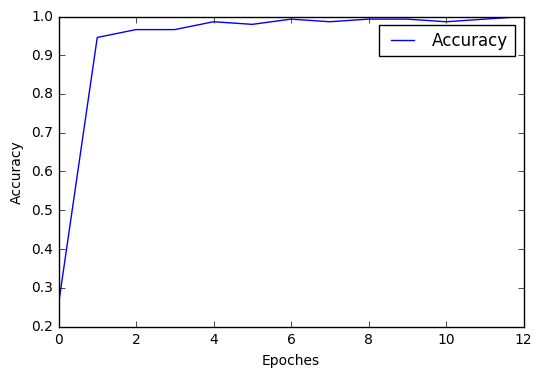

In [10]:
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.plot(accuracy, label="Accuracy")

plt.legend()
plt.show()

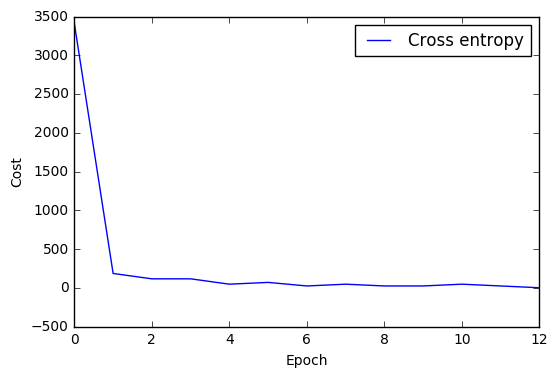

In [11]:
plt.plot(cost, label="Cross entropy")
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()

# 3.2

In [12]:
X_test = []
for i in range(len(test)):
    x =[]
    x.append(1.0)
    for j in test.iloc[i].values:
        x.append(j)
    
    X_test.append(x)
X_test = np.array(X_test)

for i in range(Dimension):
    X_test[:, i] = (X_test[:, i] - X_test[:, i].mean())/(np.std(X_test[:, i], axis=0) + 10**-10)

In [13]:
test_scores = np.dot(X_test, weights)
y = np.zeros([len(test_scores), 3])

for i in range(len(test_scores)):
    soft_result =  softmax(test_scores[i])
    y[i][0], y[i][1], y[i][2] = soft_result[0], soft_result[1], soft_result[2]

predict = []
for i in y:
    predict.append(np.argmax(i))
    
print("test classsificaiton result:")
print(np.array(predict))

test classsificaiton result:
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


# 3.3

Variables: 1


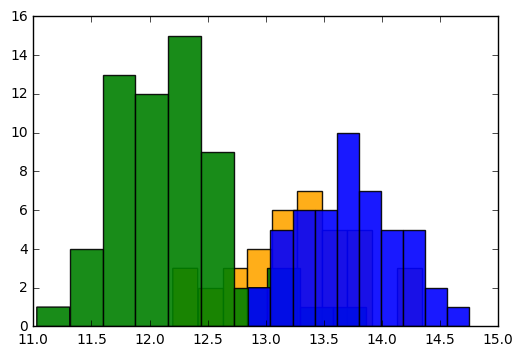

Variables: 2


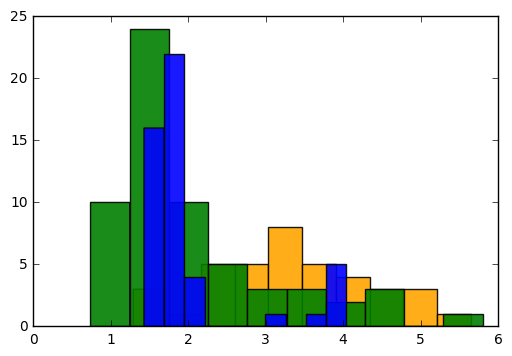

Variables: 3


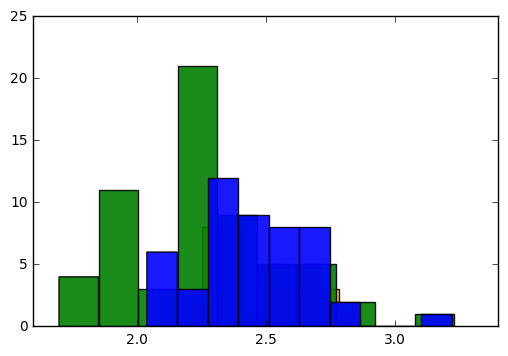

Variables: 4


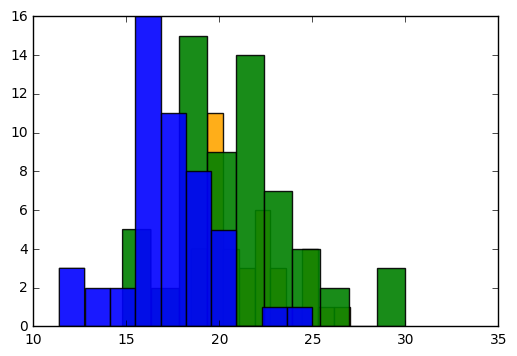

Variables: 5


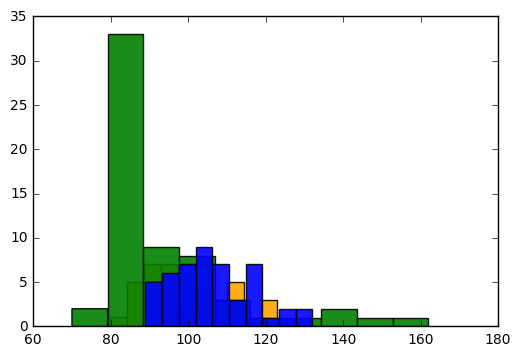

Variables: 6


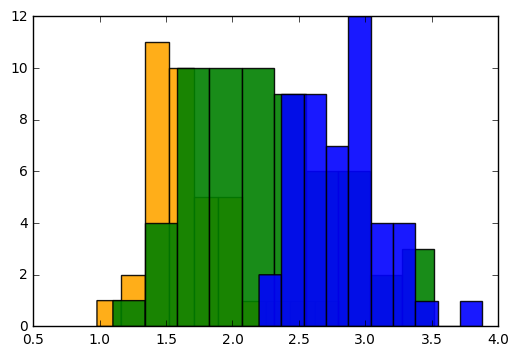

Variables: 7


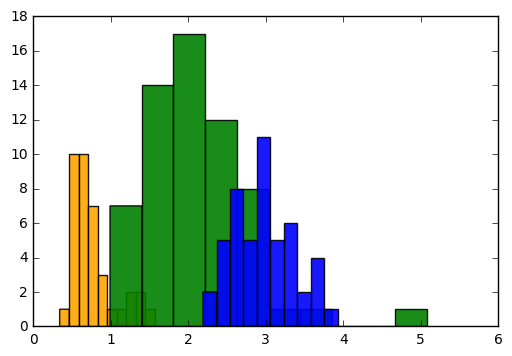

Variables: 8


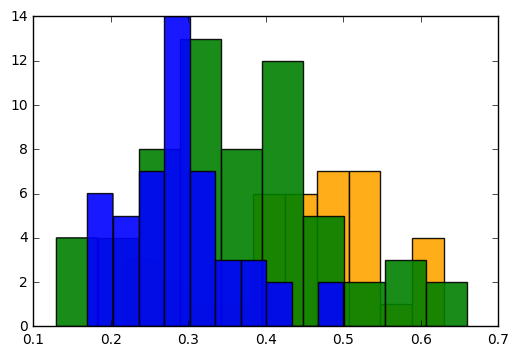

Variables: 9


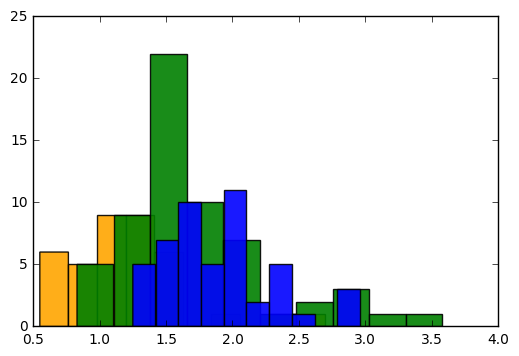

Variables: 10


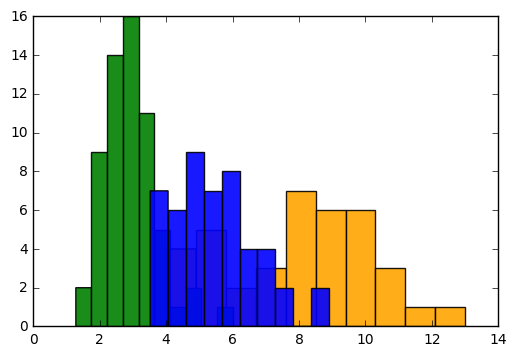

Variables: 11


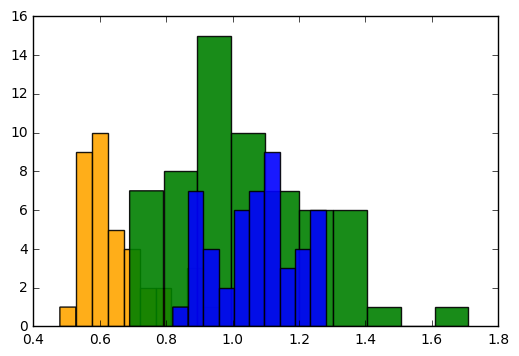

Variables: 12


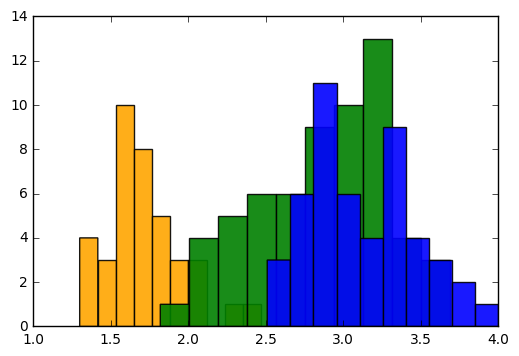

Variables: 13


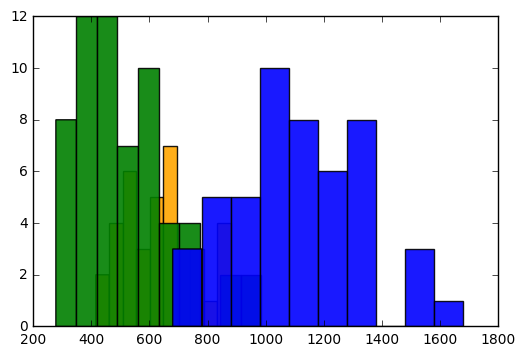

In [14]:

labels = []
for i in target:
    labels.append(np.argmax(i))

labels = np.array(labels)

X1 = []
X2 = []
X3 = []

for i in range(len(X_train_original)):
    if labels[i]==0:
        X1.append(X_train_original[i])
    elif labels[i]==1:
        X2.append(X_train_original[i])
    elif labels[i]==2:
        X3.append(X_train_original[i])

X1 = np.asarray(X1)
X2 = np.asarray(X2)
X3 = np.asarray(X3)

for i in range(1, X_train_original.shape[1]):
    print("Variables: {}".format(i))
    plt.hist(X1[:, i], color="orange", label='1', alpha=0.9)
    plt.hist(X2[:, i], color="g", label='2', alpha=0.9)
    plt.hist(X3[:, i], color="b", label='3', alpha=0.9)
    plt.show()

# 3.4

Cost function is a convex function, thus hessian can brings to the global minimum.

# 3.5

In [15]:
# find pairs

pairs = [-1, -1]

save_y = []
correct_most = 0

y = np.zeros_like(target)

for combine1 in range(1, Dimension): # 0 first is w0
    for combine2 in range(1, Dimension):
        if combine1 == combine2:
            continue
        else:
            X_var = np.zeros([len(X_train), 2])
            test_weights = np.concatenate( (weights[:,][combine1], weights[:,][combine2]), axis = 0).reshape(2, 3)
            #X_var = []
            for i in range(X_train.shape[0]):
                X_var2 = np.array( [X[i][combine1], X[i][combine2]]).reshape(1, 2)
                X_var[i][0], X_var[i][1] = X_var2[0][0], X_var2[0][1]
    
            scores = np.dot(X_var, test_weights)
            
            correct = 0
            for i in range(len(scores)):
                soft_result =  softmax(scores[i])
                if np.argmax(soft_result) == np.argmax(target[i]):
                    correct +=1
            
            if correct > correct_most :
                correct_most = correct
                pairs[0] = combine1 # for original is 0~ 12
                pairs[1] = combine2
                print("paris", pairs," classsificaiton result:", correct/(len(X)))
                save_y = y
print()
print("Most Contributive Variables is", pairs)

paris [1, 2]  classsificaiton result: 0.7972972972972973
paris [1, 6]  classsificaiton result: 0.8378378378378378
paris [1, 7]  classsificaiton result: 0.9256756756756757

Most Contributive Variables is [1, 7]


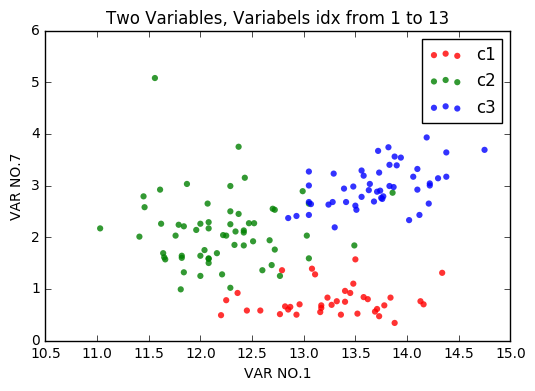

In [16]:
# Create data

class_belong = dict({1:[[],[]], 2:[[], []], 3:[[], []]})

for i in range(len(X_train_original)):
    idx = np.argmax(target[i])
    class_belong[idx+1][0].append(X_train_original[i][pairs[1]]) # 
    class_belong[idx+1][1].append(X_train_original[i][pairs[0]]) # pairs[1]

c1 = (np.array(class_belong[1][1]) ,np.array(class_belong[1][0]))
c2 = (np.array(class_belong[2][1]), np.array(class_belong[2][0]))
c3 = (np.array(class_belong[3][1]), np.array(class_belong[3][0]))

data = (c1, c2, c3)
colors = ("red", "green", "blue")
groups = ("c1", "c2", "c3") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg = "1.0")
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha = 0.8, c = color, edgecolors = 'none',  label = group)

plt.xlabel('VAR NO.1')
plt.ylabel('VAR NO.7')
plt.title('Two Variables, Variabels idx from 1 to 13')
plt.legend(loc = 1)
plt.show()


# 3.6

In [17]:
y = np.zeros_like(target)

In [18]:
def train_pairvar(X, target, pairs):

    
    lenpairs = len(pairs)+1 # 2 variables with w0
    weights = np.zeros([lenpairs, 3]) # initalization for weights
    cost = []
    accuracy = []
    epoches = 1
    
    e_ACCURACY = 0.92
    acc = 0
    
    # generate X_pairs data
    X_pairs = []
    for i in range(0, len(X)):
        record = []
        record.append(X[i][0]) # for multiply w0
        record.append(X[i][pairs[0]])
        record.append(X[i][pairs[1]])
        X_pairs.append(np.array(record))
    X_pairs = np.array(X_pairs)
    
    y = np.zeros_like(target)

    while(acc  < e_ACCURACY):
        
        scores = np.dot(X_pairs, weights)    
        for i in range(len(y)):
            soft_result =  softmax(scores[i])
            y[i][0], y[i][1], y[i][2] = soft_result[0], soft_result[1], soft_result[2]
     
        h = Hessians(X_pairs, y)

        grad = np.dot(X_pairs.T, target-y)
        grad = np.swapaxes(grad, 0, 1).reshape(9, 1)

        
        H_inv = np.linalg.inv(h + (np.eye(h.shape[0]) * (10**-10)))
        H_inv_dot_val  = np.dot(H_inv, grad)
        updatew = np.concatenate( (H_inv_dot_val[:3], H_inv_dot_val[3:6]), axis = 1)
        updatew = np.concatenate( (updatew, H_inv_dot_val[6:9]), axis = 1)
        
        weights = weights + updatew
        
        cross_cost = (-target * np.log(y + 10**-10)).sum()
        cost.append(cross_cost)
        
        correct = 0
        for p, t in zip(y, target):
            if np.argmax(p) == np.argmax(t):
                correct +=1
        acc =  correct / len(target)
        accuracy.append(acc)
        
        print("loss:", cross_cost, " accuracy:", acc, " epoches", epoches)
        epoches +=1
    
    
    return cost, accuracy, weights

In [19]:
cost, accuracy, weights = train_pairvar(X, target, pairs)

loss: 3407.82593763  accuracy: 0.25675675675675674  epoches 1
loss: 230.258509286  accuracy: 0.9324324324324325  epoches 2


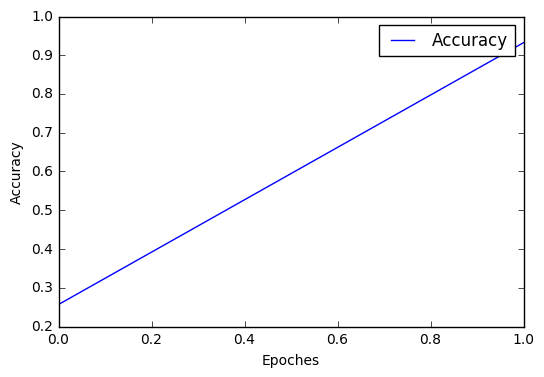

In [20]:
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.plot(accuracy, label="Accuracy")

plt.legend()
plt.show()

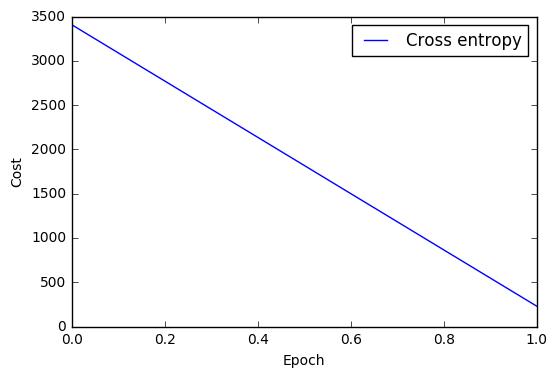

In [21]:
plt.plot(cost, label="Cross entropy")
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()